<a href="https://colab.research.google.com/github/MuhammadAfaan/Data-Science_Labs/blob/main/Data_Science_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('covid_19_clean_complete.csv')

In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [7]:
df["Deaths"].fillna(0, inplace=True)
df["Recovered"].fillna(0, inplace=True)
df.head()

<ipython-input-7-25400fc88a1e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Deaths"].fillna(0, inplace=True)
<ipython-input-7-25400fc88a1e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [8]:
df["Active"] = df["Confirmed"] - df["Deaths"] - df["Recovered"]
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [9]:
df_grouped = df.groupby(["Date", "Country/Region"])[["Confirmed", "Deaths", "Recovered", "Active"]].sum().reset_index()
df_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


In [10]:
cleaned_file_path = "covid_19_cleaned.csv"
df_grouped.to_csv(cleaned_file_path, index=False)

In [13]:
df = pd.read_csv(cleaned_file_path)
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


In [16]:
selected_countries = ["Pakistan", "India", "United Kingdom", "China", "France", "Italy"]
df_selected = df[df["Country/Region"].isin(selected_countries)]
df_selected.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
36,2020-01-22,China,548,17,28,503
61,2020-01-22,France,0,0,0,0
79,2020-01-22,India,0,0,0,0
85,2020-01-22,Italy,0,0,0,0
128,2020-01-22,Pakistan,0,0,0,0


In [19]:
fig_scatter = px.scatter(
    df_selected,
    x="Date",
    y="Confirmed",
    color="Country/Region",
    title="Confirmed Cases Over Time",
    labels={"Confirmed": "Confirmed Cases", "Date": "Date"},
    hover_name="Country/Region"
)
fig_scatter.show()


In [20]:
df_latest = df_selected[df_selected["Date"] == df_selected["Date"].max()]

fig_bar = px.bar(
    df_latest,
    x="Country/Region",
    y="Confirmed",
    color="Country/Region",
    title="Cumulative Confirmed Cases by Country",
    labels={"Confirmed": "Total Confirmed Cases", "Country/Region": "Country"}
)
fig_bar.show()


In [22]:
for country in selected_countries:
    df_country = df_selected[df_selected["Country/Region"] == country]

    fig_bar_time = px.bar(
        df_country,
        x="Date",
        y="Confirmed",
        title=f"Confirmed Cases Over Time - {country}",
        labels={"Confirmed": "Confirmed Cases", "Date": "Date"}
    )

    fig_bar_time.show()


In [26]:
fig_map = px.choropleth(
    df_latest_world,
    locations="Country/Region",
    locationmode="country names",
    color="Confirmed",
    hover_name="Country/Region",
    hover_data={"Confirmed": True, "Deaths": True, "Recovered": True},  # Extra hover info
    title="Worldwide COVID-19 Confirmed Cases",
    color_continuous_scale="Reds"
)

fig_map.update_layout(geo=dict(showcoastlines=True, projection_type="natural earth"))
fig_map.show()


# Task#**C**

In [27]:
pip install prophet

In [28]:
from prophet import Prophet

In [31]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Select data for Pakistan
df_pakistan = df[df["Country/Region"] == "Pakistan"]

df_pakistan = df_pakistan[["Date", "Confirmed"]].rename(columns={"Date": "ds", "Confirmed": "y"})

df_pakistan.head()

,ds,y
128,2020-01-22,0
315,2020-01-23,0
502,2020-01-24,0
689,2020-01-25,0
876,2020-01-26,0


In [32]:
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model.fit(df_pakistan)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8031yxfe/x236wy48.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8031yxfe/y2pt5gtv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92536', 'data', 'file=/tmp/tmp8031yxfe/x236wy48.json', 'init=/tmp/tmp8031yxfe/y2pt5gtv.json', 'output', 'file=/tmp/tmp8031yxfe/prophet_modelg2hcrp82/prophet_model-20250313052646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:26:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:26:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
future = model.make_future_dataframe(periods=15)  # Predict next 15 days
predictions = model.predict(future)

print(predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15))


            ds           yhat     yhat_lower     yhat_upper
188 2020-07-28  276835.599746  275897.466937  277729.361904
189 2020-07-29  279216.519083  278247.317477  280133.715720
190 2020-07-30  282089.581687  281195.765964  283024.558905
191 2020-07-31  285387.748002  284453.502045  286302.421971
192 2020-08-01  289831.865071  288871.248415  290765.615202
193 2020-08-02  295438.406174  294521.849681  296375.391190
194 2020-08-03  301688.346335  300769.842396  302772.655728
195 2020-08-04  309275.051740  308265.094114  310328.938714
196 2020-08-05  318177.403839  317099.800628  319344.664464
197 2020-08-06  328359.289659  327273.239288  329459.295988
198 2020-08-07  339699.372481  338533.141161  340902.364399
199 2020-08-08  352840.235558  351614.647227  354134.132357
200 2020-08-09  367695.710561  366461.080383  368995.167036
201 2020-08-10  383619.929989  382295.696339  385107.553880
202 2020-08-11  401156.017111  399710.094658  402769.664945


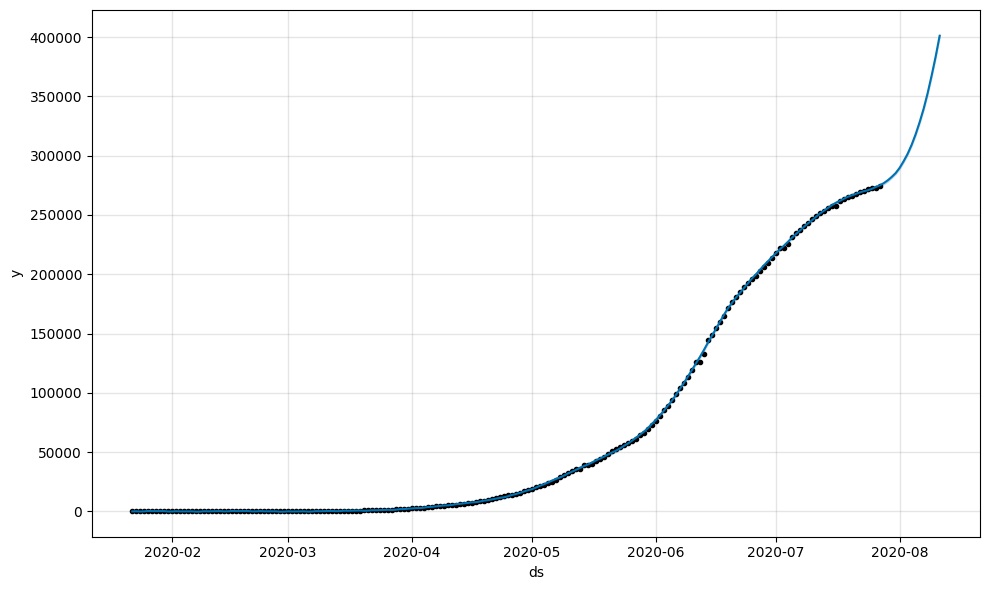

In [34]:
fig1 = model.plot(predictions)
plt.show()

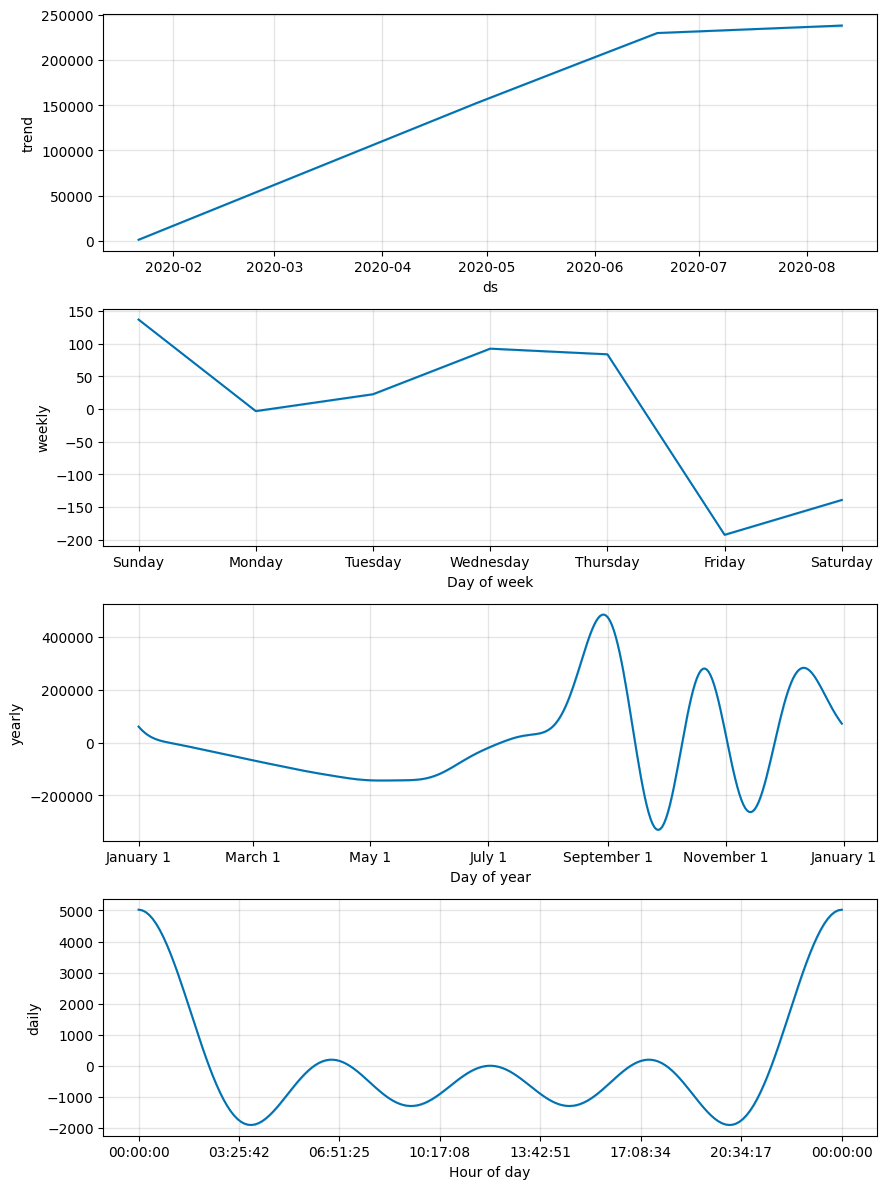

In [35]:
fig2 = model.plot_components(predictions)
plt.show()
